<a href="https://colab.research.google.com/github/Sivalakshmi2004/SMOKE_PREDICITION/blob/main/SMOKE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMOKE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow import keras

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/smoking.csv")
data

,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male
0,Afghanistan,1980,5.700000,10.4,18.400000,2.4,733520,81707,651813
1,Afghanistan,1981,5.800000,10.5,18.400000,2.3,720102,79276,640826
2,Afghanistan,1982,5.800000,10.5,18.500000,2.3,700415,76061,624355
3,Afghanistan,1983,5.900000,10.5,18.600000,2.3,676984,72411,604572
4,Afghanistan,1984,6.000000,10.6,18.600000,2.3,653812,68908,584905
...,...,...,...,...,...,...,...,...,...
6199,Zimbabwe,2008,20.100000,11.2,21.000000,2.0,839607,75975,763631
6200,Zimbabwe,2009,20.299999,11.2,21.000000,1.9,845442,75216,770225
6201,Zimbabwe,2010,20.500000,11.2,21.000000,1.9,860929,75113,785817
6202,Zimbabwe,2011,20.600000,11.2,21.100000,1.9,888279,75791,812488


**DATA CLEANING**

In [ ]:
# Handling Missing Values
data.dropna(subset=['Data.Daily cigarettes', 'Data.Percentage.Male', 'Data.Percentage.Female'], inplace=True)



In [ ]:
# Handling Duplicates
data.drop_duplicates(subset=['Country', 'Year'], keep='first', inplace=True)
# This line will remove duplicate rows based on 'Country' and 'Year' columns, keeping the first occurrence

In [ ]:
# Save the cleaned data to a new file
data.to_csv('cleaned_smoke_dataset.csv', index=False)
data

,Country,Year,Data.Daily cigarettes,Data.Percentage.Male,Data.Percentage.Female,Data.Percentage.Total,Data.Smokers.Total,Data.Smokers.Female,Data.Smokers.Male
0,Afghanistan,1980,5.700000,10.4,18.400000,2.4,733520,81707,651813
1,Afghanistan,1981,5.800000,10.5,18.400000,2.3,720102,79276,640826
2,Afghanistan,1982,5.800000,10.5,18.500000,2.3,700415,76061,624355
3,Afghanistan,1983,5.900000,10.5,18.600000,2.3,676984,72411,604572
4,Afghanistan,1984,6.000000,10.6,18.600000,2.3,653812,68908,584905
...,...,...,...,...,...,...,...,...,...
6199,Zimbabwe,2008,20.100000,11.2,21.000000,2.0,839607,75975,763631
6200,Zimbabwe,2009,20.299999,11.2,21.000000,1.9,845442,75216,770225
6201,Zimbabwe,2010,20.500000,11.2,21.000000,1.9,860929,75113,785817
6202,Zimbabwe,2011,20.600000,11.2,21.100000,1.9,888279,75791,812488


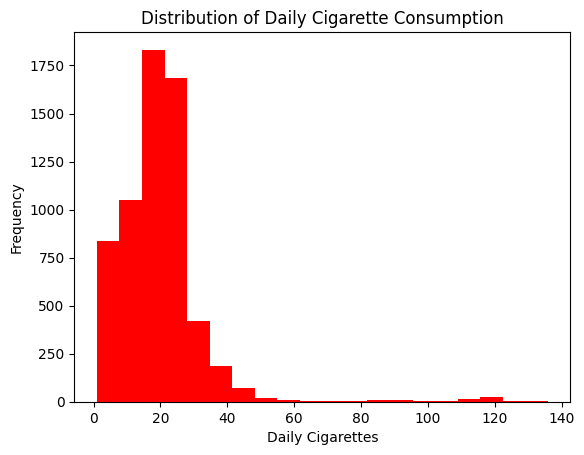

In [ ]:
#histplot
plt.hist(data['Data.Daily cigarettes'], bins=20, color='red')
plt.xlabel('Daily Cigarettes')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Cigarette Consumption')
plt.show()

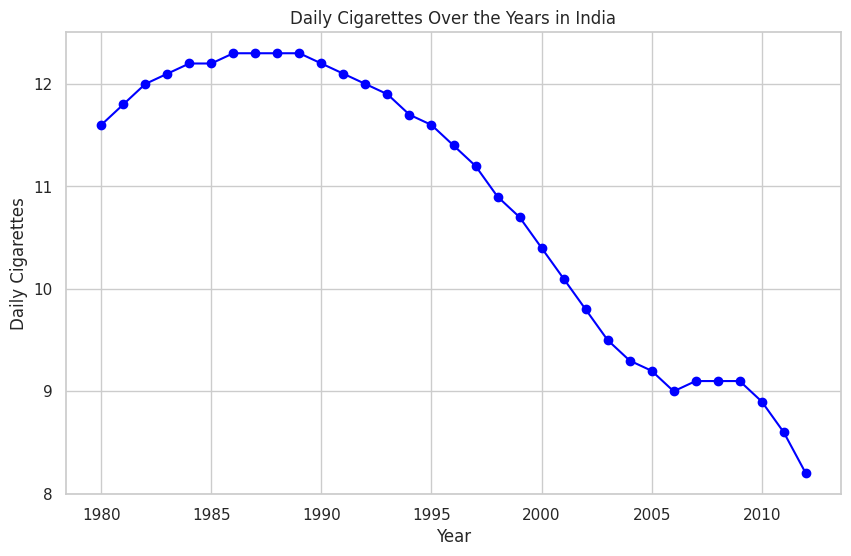

In [ ]:
#lineplot
# Select a specific country for the line plot
country_to_plot = 'India'  # Replace with the country you want to visualize

# Filter the data for the selected country
data_for_country = data[data['Country'] == country_to_plot]

# Create a line plot for the daily number of cigarettes smoked over the years
plt.figure(figsize=(10, 6))
plt.plot(data_for_country['Year'], data_for_country['Data.Daily cigarettes'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Daily Cigarettes')
plt.title(f'Daily Cigarettes Over the Years in {country_to_plot}')
plt.grid(True)
plt.show()


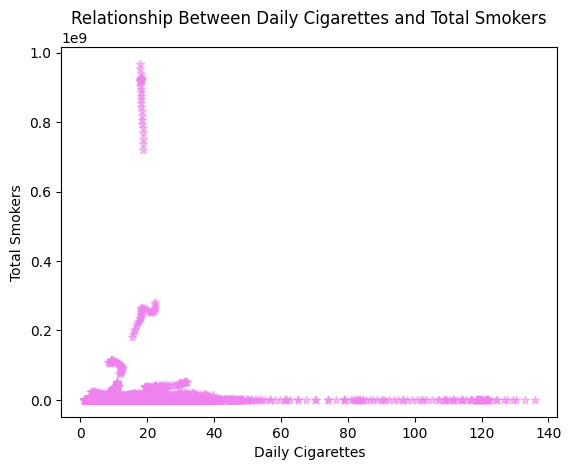

In [ ]:
# Create a scatter plot for "Data.Smokers.Total" vs. "Data.Daily cigarettes"
plt.scatter(data['Data.Daily cigarettes'], data['Data.Smokers.Total'], alpha=0.5, color='violet',marker="*")
plt.xlabel('Daily Cigarettes')
plt.ylabel('Total Smokers')
plt.title('Relationship Between Daily Cigarettes and Total Smokers')
plt.show()

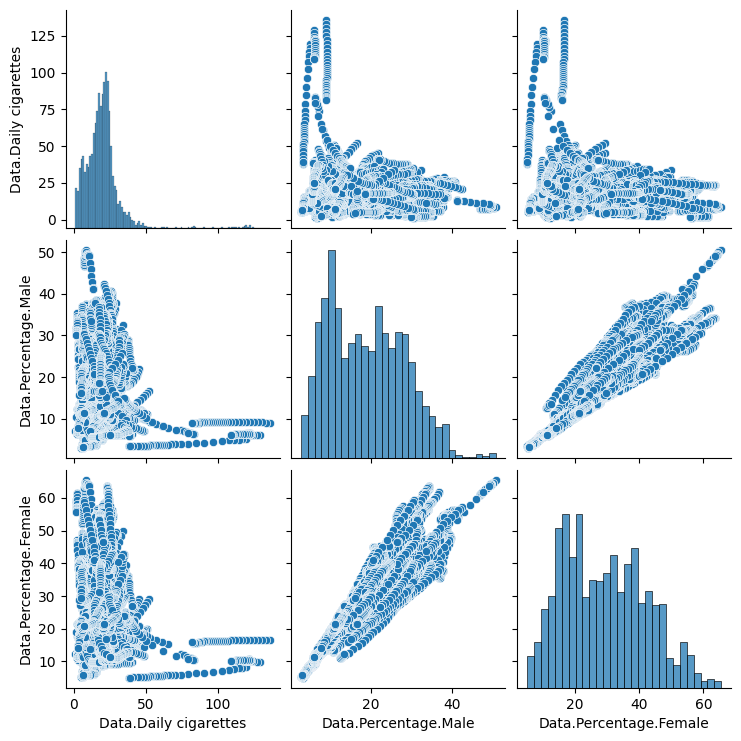

In [ ]:
features = ["Data.Daily cigarettes", "Data.Percentage.Male", "Data.Percentage.Female"]

# Create a pair plot
sns.pairplot(data[features])
plt.show()





<ipython-input-11-84280634785f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


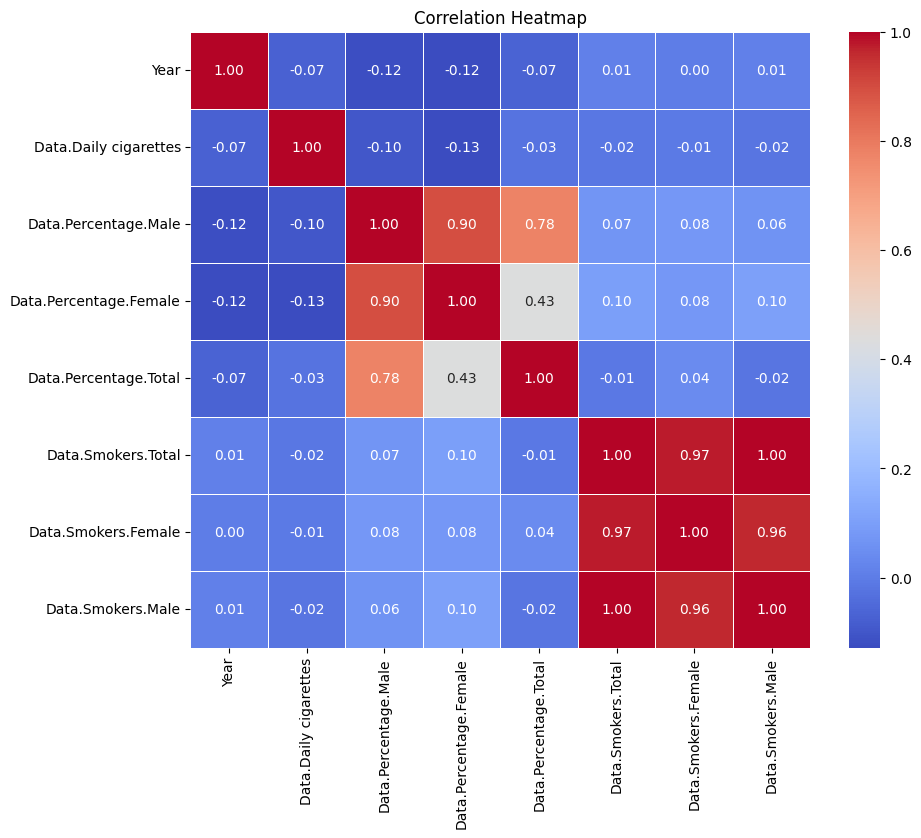

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


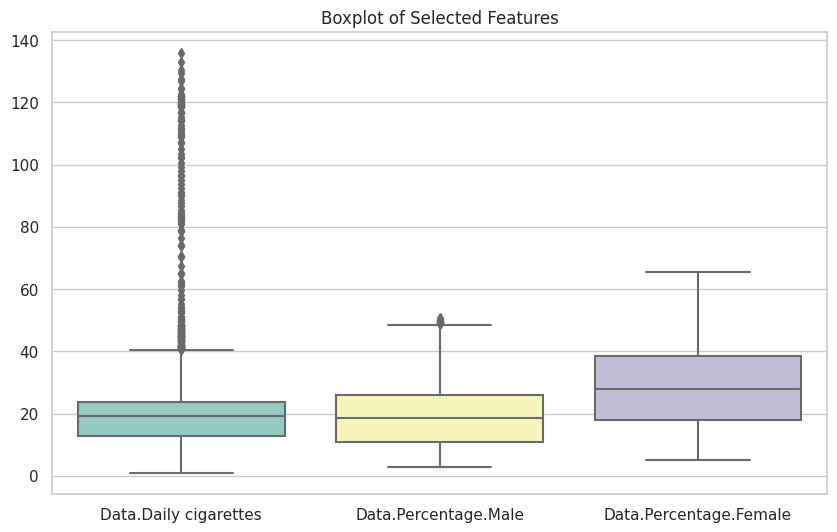

In [ ]:

# Create a boxplot
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(data=data[features], orient="v", palette="Set3")  # Create the boxplot
plt.title("Boxplot of Selected Features")
plt.show()

**DATA PREPROCESSING**

In [ ]:
# Replace column names with actual column names from your dataset
X = data[['Data.Daily cigarettes', 'Data.Percentage.Male', 'Data.Percentage.Female']]
y = data['Data.Smokers.Total']



**TRAINING MODEL**

In [ ]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
140/140 [==============================] - 3s 6ms/step - loss: 3855195394015232.0000 - val_loss: 3687592079917056.0000
Epoch 2/10
140/140 [==============================] - 1s 5ms/step - loss: 3855183314419712.0000 - val_loss: 3687567383855104.0000
Epoch 3/10
140/140 [==============================] - 1s 6ms/step - loss: 3855134727602176.0000 - val_loss: 3687501348732928.0000
Epoch 4/10
140/140 [==============================] - 1s 6ms/step - loss: 3855033258999808.0000 - val_loss: 3687378673729536.0000
Epoch 5/10
140/140 [==============================] - 1s 7ms/step - loss: 3854870587113472.0000 - val_loss: 3687200164151296.0000
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 3854637853573120.0000 - val_loss: 3686943539855360.0000
Epoch 7/10
140/140 [==============================] - 1s 10ms/step - loss: 3854311436058624.0000 - val_loss: 3686586789134336.0000
Epoch 8/10
140/140 [==============================] - 1s 8ms/step - loss: 385385509578342

**EVALUATION OF MODEL**

In [ ]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

39/39 [==============================] - 0s 5ms/step
Mean Squared Error: 7265351137336713.000
